In [2]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

# 폰트설정
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus']=False

## 1. 프리시즌 데이터 분석

In [3]:
#프리시즌 데이터 로드
preseason_df=pd.read_csv('./dataset/Pre_Season_Batter.csv')

#정규시즌 데이터 로드
regular_season_df=pd.read_csv('./dataset/Regular_Season_Batter.csv')

print(preseason_df.shape)
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [4]:
# 데이터 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


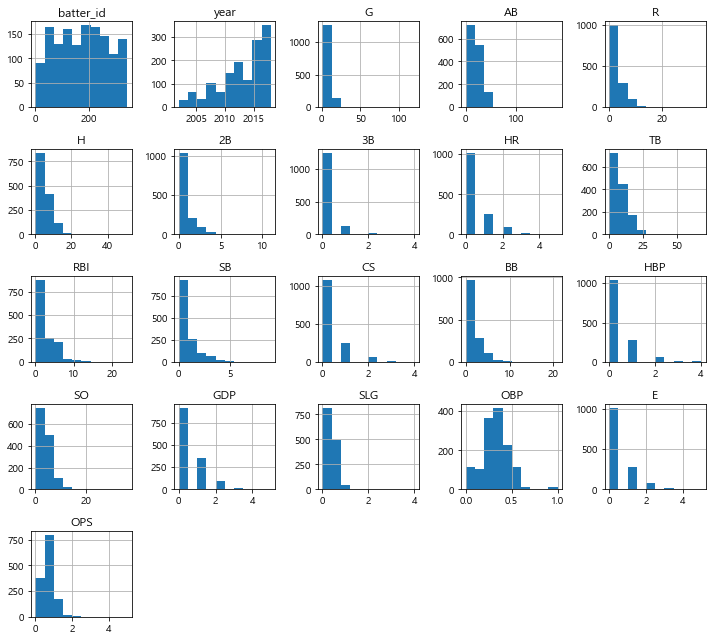

In [5]:
#데이터 시각화 (프리시즌 데이터를 히스토그램으로 시각화)
preseason_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [7]:
#정규시즌 데이터와 비교

#정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')

#프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')],axis=1).transpose().loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [8]:
# 프리시즌과 정규시즌 간의 상관관계를 알아봄
# 두 데이터의 성적을 비교하기 위해서 두 데이터에 공통으로 존재하는 선수들의 기록만 사용
# 선수와 연도 데이터를 이용해 새로운 열을 생성하고 새로운 열의 교집합을 이용해 두 데이터셋에 모두 존재하는 선수만 불러오는 방식을 적용

#타자의 이름 과 연도를 이용해 새로운 인덱스 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 인덱스의 교집합
intersection_idx=list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))

# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[
    regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop=True)

#비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop=True)

# 검정코드
print(regular_season_new.shape, regular_season_new.shape)
sum(regular_season_new['new_idx']==regular_season_new['new_idx'])

(1358, 30) (1358, 30)


1358

C:\Users\hhz20\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


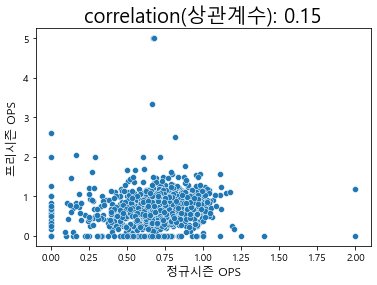

In [9]:
# 정규시즌과 프리시즌 데이터 간의 상관관계

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation(상관계수): ' + str(np.round(correlation,2)),fontsize=20)
plt.xlabel("정규시즌 OPS", fontsize=12)
plt.ylabel("프리시즌 OPS", fontsize=12)
plt.show()

#### 선형적인 모습을 띠고 있지 않은걸 보아 서로의 상관성이 매우 낮음을 알 수 있다.

#### 탐색적 데이터 분석을 통해 
#### 1. 프리시즌 데이터의 경기 기록 수는 매우 적어 정규시즌 데이터와 차이가 있을 수 있다.
#### 2. 프리시즌 데이터와 정규시즌 데이터 간 상관관계가 매우 낮다. 
#### 를 알아볼 수 있었다.
#### 이와 같은 정보를 통해 실제 분석에서는 프리시즌 데이터를 제외하기로 함.

## 2. 정규시즌 데이터 분석

In [10]:
# 기초통계량 살펴보기
regular_season_df = pd.read_csv("./dataset/Regular_Season_Batter.csv")
display(regular_season_df.shape, regular_season_df.head(), regular_season_df.describe())

(2454, 29)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


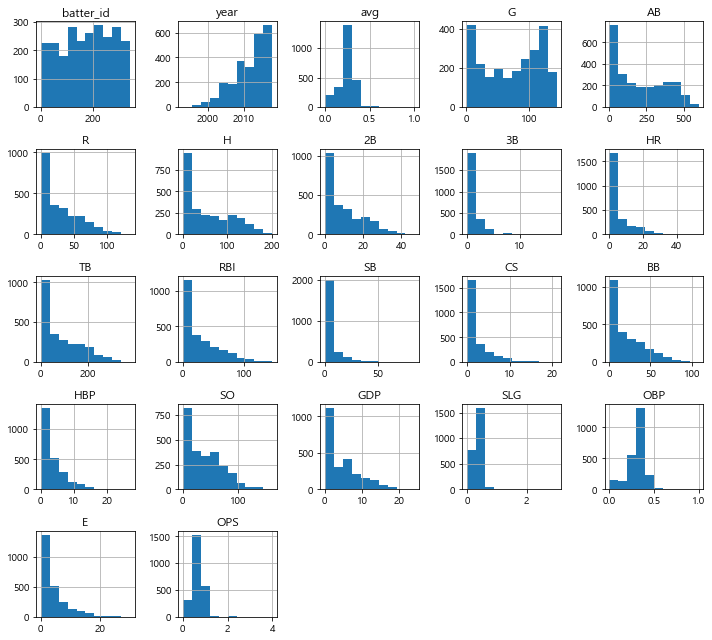

In [11]:
# 시각화
regular_season_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

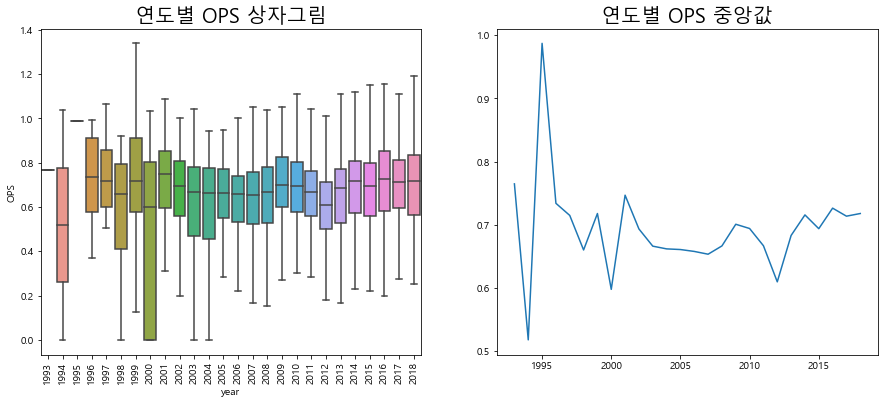

In [22]:
# 이번 대회의 예측 대상인 OPS는 중요한 변수이므로 상자그림을 통해 상세하게 살펴보기
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
g=sns.boxplot(x="year", y="OPS", data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size=20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size=20)
plt.show()

In [1]:
# 연도별 OPS의 분포를 상자그림을 통해 확인한 결과, 대부분 비슷한 형태를 띠고 있음.
# 하지만 연도별 중앙값을 보면 2000년도를 기준으로 OPS의 변동이 차이가 있음. 2000년도 이전의 기록은 변동이 상당히 크고 그 이후에는 상대적으로 변동폭이 크지 않음.


In [14]:
# 연도별 OPS에 대해 좀더 자세히 살펴보기
pd.crosstab(regular_season_df['year'],'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


In [ ]:
# 데이터를 확인한 결과 2000년도 이전에는 기록의 수가 매우 적음. 그래서 OPS의 변동폭이 컸던 것.

<function matplotlib.pyplot.show(close=None, block=None)>

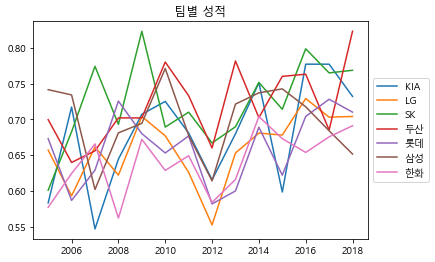

In [17]:
# 팀별 및 연도별 OPS 살펴보기

# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index=['team'], columns='year', values='OPS', aggfunc='median')

# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx=med_OPS_team.loc[:, 2005:].isna().sum(axis=1) <= 0

plt.plot(med_OPS_team.loc[team_idx,2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns,
          loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('팀별 성적')
plt.show

In [ ]:
# 신생팀이 아닌 팀들을 대상으로 연도별 팀 성적을 비교해봄.
# 성적이 계속 달라지고 순위도 변동되는 것을 확인할 수 있음.

In [31]:
# 키와 몸무게별 OPS 살펴보기

# 키와 몸무게 분리하고 몸무게를 키로 나눠 새로운 변수 생성
import re
regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x : int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0], regular_season_df['height'][0],
     regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


C:\Users\hhz20\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hhz20\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


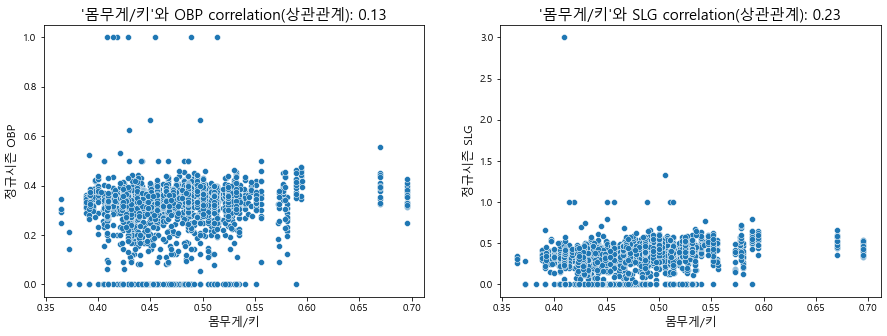

In [33]:
# 위에서 만들었던 새로운 변수가 크면 키에 비해 몸무게가 많이 나감. 그렇다면 힘이 셀것이고 반대의 경우에는 스피드가 빠를 것으로 추측
# 계산한 값이 크다면 힘과 연관성이 높은 장타율과의 상관관계를 보고, 값이 작을 때는 스피드가 중시되는 출루율과의 상관관계를 확인

# 체격과 장타율(SLG), 출루율(OBP) 간의 상관관계

# 몸무게/키 계산
regular_season_df['weight_per_height'] = regular_season_df['weight']/regular_season_df['height']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title("'몸무게/키'와 OBP correlation(상관관계): " + str(np.round(correlation, 2)), \
          fontsize=15)
plt.ylabel('정규시즌 OBP',fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.subplot(1, 2, 2)

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])
plt.title("'몸무게/키'와 SLG correlation(상관관계): " + str(np.round(correlation, 2)), \
          fontsize=15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.show()

In [ ]:
# 확인 결과, 데이터는 선형적인 모습을 띠지 않으며, 그 분포가 매우 고르게 분포돼 있음을 알 수 있다. 
# 이는 몸무게 및 키가 장타율과 출루율에 큰 영향을끼치지 않음을 알 수 있음.

In [35]:
# 포지션 관련 기록 살펴보기
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
내야수(우투양타)      7
외야수(우투양타)      7
Name: position, dtype: int64

In [37]:
# position 분리
regular_season_df['pos'] = regular_season_df['position'].apply(
    lambda x: x.split('(')[0] if pd.notnull(x) else x)

# 우타, 좌타, 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x: x[-3:-1] if pd.notnull(x) else x)

print(regular_season_df['position'][0], regular_season_df['pos'][0],
     regular_season_df['hit_way'][0])

# 이렇게 코드 작업을 통해 타자가 왼손잡이인지 오른손잡이인지, 수비 포지션은 어디인지 구분함

내야수(우투우타) 내야수 우타


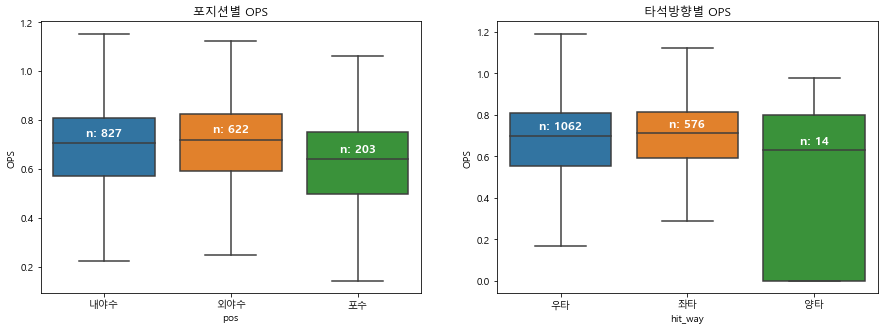

In [38]:
# 포지션별 OPS와 타석 방향별 OPS
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='pos', y='OPS', data = regular_season_df, showfliers=False)

# 포지션별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# 포지션별 관측치수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs: 
    nobs[key] = "n: " + str(nobs[key])

# 그래프의 xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), 
            medians[label.get_text()] + 0.03, nobs[label.get_text()],
            horizontalalignment='center', size='large', color='w', weight='semibold')
    
ax.set_title('포지션별 OPS')

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
ax = sns.boxplot(x='hit_way', y='OPS', data = regular_season_df, showfliers=False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            nobs[label.get_text()], horizontalalignment='center', size='large',
            color='w', weight='semibold')
ax.set_title('타석방향별 OPS')

plt.show()

In [ ]:
# 포지션별로 OPS 값을 살펴본 결과, 내야수와 외야수의 성적은 큰 차이X. 하지만 포수의 OPS는 다른 포지션보다 수치가 약간 낮음.
# 즉, 포수를 제외하고 OPS 성적에는 포지션의 영향이 그리 크지 않다는 것을 의미.
# 또한, 타자가 왼손잡이인지, 오른손잡이인지에 따른 OPS의 값은 큰 차이 X. 
# 양손잡이의 OPS가 다소 낮아보이지만, 관측치가 13개밖에 없어 결과를 신뢰하기는 어려움.

In [40]:
# 커리어와 관련한 변수를 사용해 외국인과 내국인을 구별해 데이터를 탐색
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [41]:
# career 칼럼의 값들을 보면 한국인은 초-중-고 정보를 보여하고 있고 외국이은 국가와 대학 순서로 정보를 보유하고 있음
# '-'를 공백으로 대체하고 ' ' 공백을 기준으로 데이터를 나눌것.

# career를 split
foreign_country = regular_season_df['career'].apply(
    lambda x: x.replace('-',' ').split(' ')[0])

# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(
    lambda x: np.nan if '초' in x else x)))

# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['쿠바', '미국', '도미니카', '캐나다', '네덜란드']

In [ ]:
# 도미니카, 미국, 쿠바, 네덜란드, 캐나다 국적을 가진 선수가 명단에 있음. -> 외국인으로 분류

In [42]:
# 외국인과 내국인의 성적을 비교

#국적을 의미하는 변수 추가
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x: x if pd.isnull(x)
                 else ('foreign' if x in foreign_country_list else 'korean'))
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


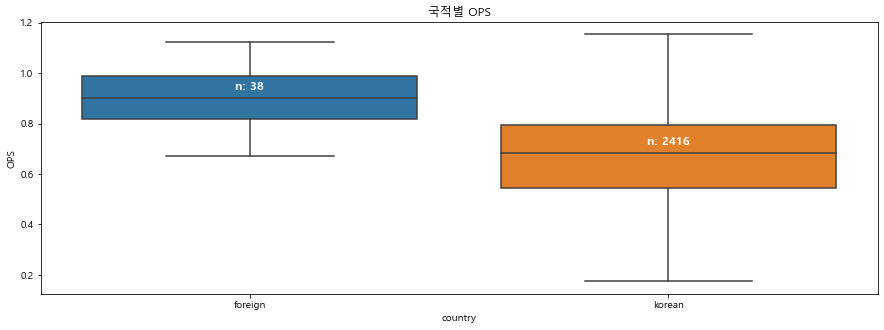

In [43]:
# 외국인과 내국인 선수 간의 성적비교
plt.figure(figsize=(15,5)) # 그래프 크기 조정
ax = sns.boxplot(x='country', y='OPS', data = regular_season_df, showfliers=False)

# 내외국인 별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()
# 내외국인 관측치 수 dict
nobs = regular_season_df['country'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환 
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
    
for label in ax.get_xticklabels(): # tick은 tick의 위치, label은 그에 해당하는 text 값 
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, \
            nobs[label.get_text()], # x 좌표, y 좌표, 해당 text
            horizontalalignment='center', size='large', color='w', weight='semibold') 
ax.set_title('국적별 OPS')
plt.show()

In [ ]:
# 비교결과, 외국인 선수들이 평균적으로 내국인 선수들보다 OPS 성적이 좋은 경향을 보임.
# 비록 외국인 선수의 숫자는 많지 않지만 명확한 차이를 보임.